In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from github import Github
from datetime import datetime

plt.rcParams["figure.figsize"] = (12, 8)

In [2]:
who_daily_reports_dir_name = "who_daily_reports"

## Download WHO daily reports data

In [3]:
who_repo_name = "CSSEGISandData/COVID-19"
who_repo_daily_reports_dir_path = "csse_covid_19_data/csse_covid_19_daily_reports"

In [4]:
# github = Github("user", "password") # Using authenticated connection changes api limit from 60 per hour to 5000 per hour
github = Github()
repo = github.get_repo(who_repo_name)
reports_dir_content = repo.get_contents(who_repo_daily_reports_dir_path)

In [5]:
reports = list(filter(lambda report: ".csv" in report.name, reports_dir_content))
reports[:5]

[ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-22-2020.csv"),
 ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-23-2020.csv"),
 ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-24-2020.csv"),
 ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-25-2020.csv"),
 ContentFile(path="csse_covid_19_data/csse_covid_19_daily_reports/01-26-2020.csv")]

In [6]:
try:
    os.mkdir(who_daily_reports_dir_name)
    print("Created directory", who_daily_reports_dir_name)
except FileExistsError:
    print('WHO daily reports directory already exists')
    
for report in reports:
    try:
        report_file_path = os.path.join(who_daily_reports_dir_name, report.name)
        report_file = open(report_file_path, 'x')
        report_file.write(report.decoded_content.decode('utf-8'))
        report_file.close()
        print("Created report file", report_file_path)
    except FileExistsError:
        print("Daily report file", report_file_path, "already exists")
    except RateLimitExceededException:
        print("API rate limit exceeded, try again in an hour")
        report_file.close()
        os.remove(report_file_path)
        break

WHO daily reports directory already exists
Daily report file who_daily_reports/01-22-2020.csv already exists
Daily report file who_daily_reports/01-23-2020.csv already exists
Daily report file who_daily_reports/01-24-2020.csv already exists
Daily report file who_daily_reports/01-25-2020.csv already exists
Daily report file who_daily_reports/01-26-2020.csv already exists
Daily report file who_daily_reports/01-27-2020.csv already exists
Daily report file who_daily_reports/01-28-2020.csv already exists
Daily report file who_daily_reports/01-29-2020.csv already exists
Daily report file who_daily_reports/01-30-2020.csv already exists
Daily report file who_daily_reports/01-31-2020.csv already exists
Daily report file who_daily_reports/02-01-2020.csv already exists
Daily report file who_daily_reports/02-02-2020.csv already exists
Daily report file who_daily_reports/02-03-2020.csv already exists
Daily report file who_daily_reports/02-04-2020.csv already exists
Daily report file who_daily_repor

## WHO daily reports basic analysis

In [7]:
column_names = ['Province/State', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered']

reports_files = sorted(os.listdir(who_daily_reports_dir_name))
reports = []
for report_file in reports_files:
    date = datetime.strptime(report_file[:-4], '%m-%d-%Y')
    dataframe = pd.read_csv(os.path.join(who_daily_reports_dir_name, report_file))[column_names]

    dataframe['Province/State'].fillna("NotSpecified", inplace=True)
    dataframe.fillna(0, inplace=True)

    dataframe = dataframe.astype({'Confirmed': 'int32', 'Deaths': 'int32', 'Recovered': 'int32'}, copy=False)
    
    reports.append((date, dataframe))


In [8]:
print(reports[0][1].dtypes)
print(reports[0][0])
reports[0][1]

Province/State    object
Country/Region    object
Confirmed          int32
Deaths             int32
Recovered          int32
dtype: object
2020-01-22 00:00:00


,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,Anhui,Mainland China,1,0,0
1,Beijing,Mainland China,14,0,0
2,Chongqing,Mainland China,6,0,0
3,Fujian,Mainland China,1,0,0
4,Gansu,Mainland China,0,0,0
5,Guangdong,Mainland China,26,0,0
6,Guangxi,Mainland China,2,0,0
7,Guizhou,Mainland China,1,0,0
8,Hainan,Mainland China,4,0,0
9,Hebei,Mainland China,1,0,0


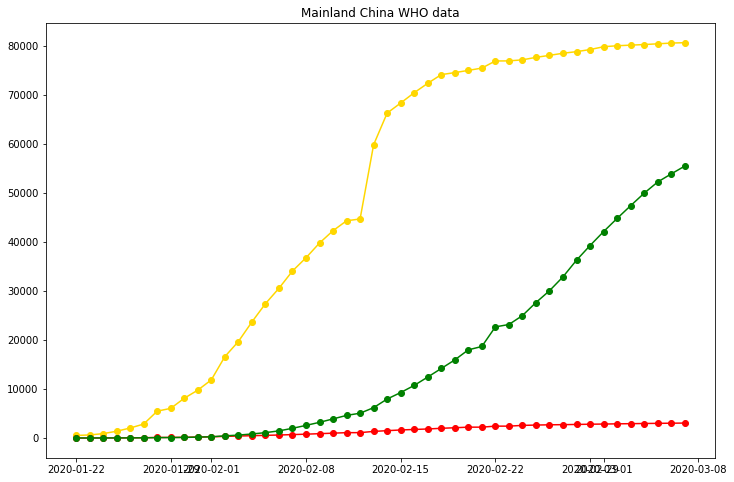

In [12]:
report = reports[0][1]

dates = []
mainland_china_confirmed = []
mainland_china_deaths = []
mainland_china_recovered = []

for report in reports:
    dates.append(report[0])
    region_aggregated_stats = report[1].groupby('Country/Region').sum()
    mainland_china_stats = region_aggregated_stats.loc['Mainland China', :]
    
    mainland_china_confirmed.append(mainland_china_stats['Confirmed'])
    mainland_china_deaths.append(mainland_china_stats['Deaths'])
    mainland_china_recovered.append(mainland_china_stats['Recovered'])
    

fig, ax = plt.subplots()
ax.set_title('Mainland China WHO data')
ax.plot(dates, mainland_china_confirmed, 'o-', c='gold')
ax.plot(dates, mainland_china_deaths, 'o-', c='red')
ax.plot(dates, mainland_china_recovered, 'o-', c='green')
plt.show()